In [2]:
pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=42399d19dedbdf7c126b67d842efdcf8ad6af50c90608da32e46570efeea1302
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


--- Language Identification ---
detected_language
de    397
es    379
en    338
pt    229
fr    222
tl      1
Name: count, dtype: int64


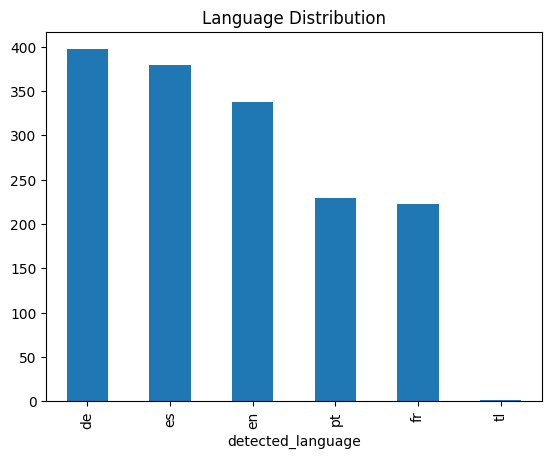

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
file_path = '/content/helpdesk_customer_multi_lang_tickets.csv'
data = pd.read_csv(file_path)

# 1. Language Identification
print("--- Language Identification ---")
def detect_language(text):
    try:
        return detect(text)
    except LangDetectException:
        return 'unknown'

# Check and validate language column
data['detected_language'] = data['body'].apply(lambda x: detect_language(str(x)))
language_distribution = data['detected_language'].value_counts()
print(language_distribution)

# Plot language distribution
language_distribution.plot(kind='bar', title='Language Distribution')
plt.show()

--- Categorization ---
type
Incident    663
Request     468
Problem     292
Change      143
Name: count, dtype: int64


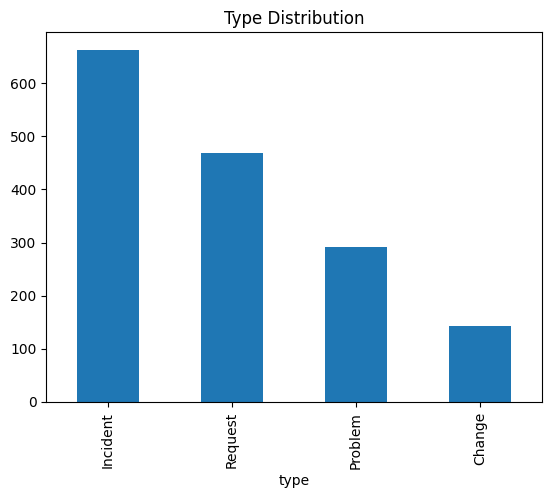

queue
Technical Support                  589
Product Support                    288
Customer Service                   234
IT Support                         179
Billing and Payments               117
Sales and Pre-Sales                 49
Returns and Exchanges               44
Service Outages and Maintenance     44
General Inquiry                     13
Human Resources                      9
Name: count, dtype: int64


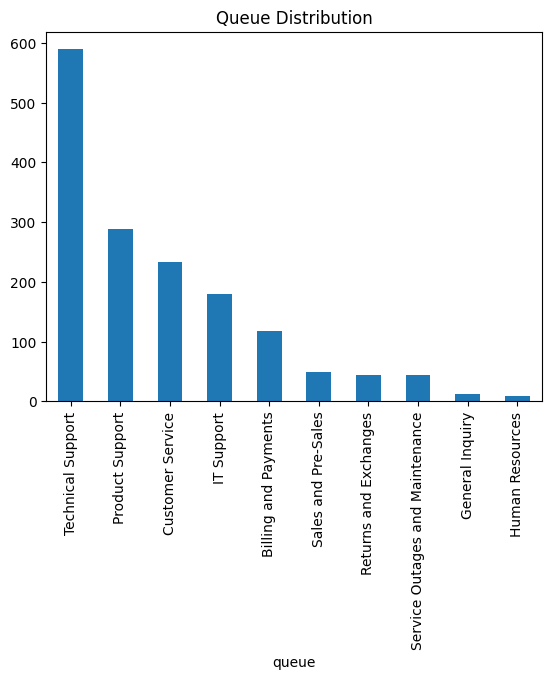

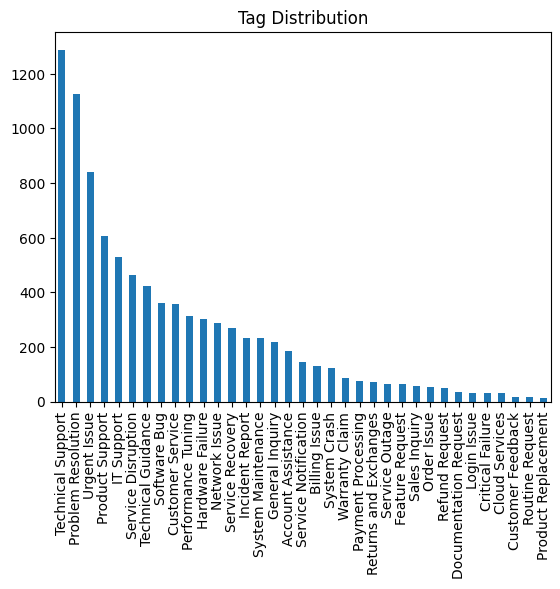

In [ ]:
# 2. Categorization
print("--- Categorization ---")
categories = data['type'].value_counts()
print(categories)

# Plot type distribution
categories.plot(kind='bar', title='Type Distribution')
plt.show()

queues = data['queue'].value_counts()
print(queues)

# Plot queue distribution
queues.plot(kind='bar', title='Queue Distribution')
plt.show()

# Analyze tags
all_tags = pd.concat([data[f'tag_{i}'] for i in range(1, 10)])
tag_counts = all_tags.value_counts()
tag_counts = tag_counts[tag_counts > 10]  # Filter less frequent tags

# Plot tag distribution
tag_counts.plot(kind='bar', title='Tag Distribution')
plt.show()

--- Response Analysis ---


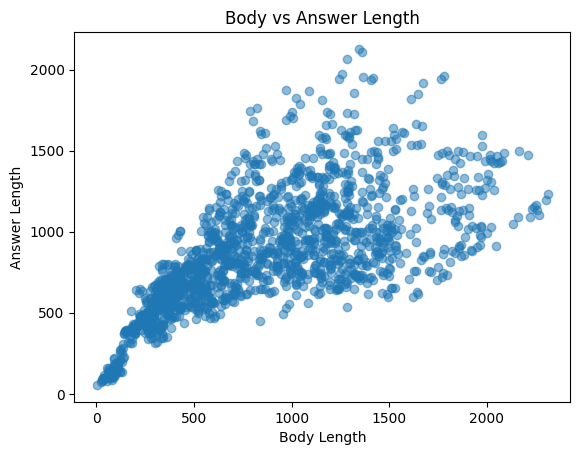

In [ ]:
#3. Response Analysis
print("--- Response Analysis ---")
data['body_length'] = data['body'].apply(lambda x: len(str(x)))
data['answer_length'] = data['answer'].apply(lambda x: len(str(x)))

#Compare body and answer lengths
plt.scatter(data['body_length'], data['answer_length'], alpha=0.5)
plt.title('Body vs Answer Length')
plt.xlabel('Body Length')
plt.ylabel('Answer Length')
plt.show()

In [ ]:
# 4.Recommendation Engine
print("--- Recommendation Engine ---")
# Prepare data for tag prediction
# Using tag_1 as the target for demonstration
vectorizer = CountVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(data['body'].fillna('')).toarray()
y = data['tag_1'].fillna('Unknown')

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


--- Recommendation Engine ---
Accuracy: 0.5851063829787234
                       precision    recall  f1-score   support

        Billing Issue       1.00      0.67      0.80        36
 Consultation Request       0.00      0.00      0.00         0
     Critical Failure       0.00      0.00      0.00         2
     Customer Service       0.43      0.25      0.32        12
      Feature Request       0.00      0.00      0.00         2
      General Inquiry       0.00      0.00      0.00         2
     Hardware Failure       0.00      0.00      0.00         5
           IT Support       0.37      0.24      0.29        45
          Login Issue       0.00      0.00      0.00         1
        Network Issue       0.68      0.68      0.68        22
       Password Reset       1.00      1.00      1.00         1
   Performance Tuning       0.00      0.00      0.00         2
      Product Support       0.40      0.10      0.15        21
Returns and Exchanges       0.86      0.50      0.63      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [ ]:
pip install googletrans

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [9]:
# Random Sampling
# Simple random sample of 10 rows
random_sample = data.sample(10)
print(random_sample)

# Stratified sampling based on a column
if 'category_column' in data.columns:
    stratified_sample = data.groupby('category_column', group_keys=False).apply(lambda x: x.sample(min(len(x), 5)))
    print(stratified_sample)


                 id                                            subject  \
1384  8641976757750          Problema con el Dell XPS 13 al encenderse   
1252  7510413237033  Panne de réseau due à la défaillance du routeu...   
258   1956029076720               Urgente: Problemas con Cisco ISR4331   
984   5621539778724  Problèmes audio fréquents avec l'application Zoom   
1221  7291393439152                   Problème de Configuration Réseau   
1276  7687949452105         Dringend: AWS Managementdienst ausgefallen   
1531  9781886619246                Solicitação de Consulta de Servidor   
37    1148380438570    Assistance Required: Printer Connectivity Issue   
283   2048430313380  Touchscreen and Keyboard Issues with Surface P...   
916   5163770186288  Solicitação de Troca de Produto Devido a Probl...   

                                                   body  \
1384  Estimado cliente del soporte de Tech Online St...   
1252  Cher support client,\n\nNous subissons une pan...   
258   Es